In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets  import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X = mnist['data']
y = mnist['target']



In [4]:
print(f"X shape : {X.shape}")
print(f"y shape : {y.shape}")

X shape : (70000, 784)
y shape : (70000,)


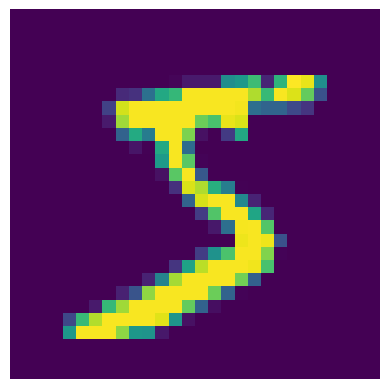

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.axis("off")

# save_fig("some_digit_plot")
plt.show()

In [6]:
y[0]

'5'

In [7]:
y = y.astype(np.uint8)

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image,
               interpolation="nearest")
    plt.axis("off")

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, **options)
    plt.axis("off")

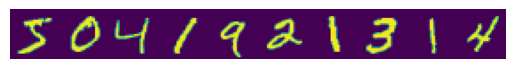

In [10]:
plot_digits(X[:10])

# SAM

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2)

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [14]:
from sklearn.linear_model import SGDClassifier

In [15]:
sgdc = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)


In [16]:
sgdc.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgdc.predict([X[0]])

array([ True])

In [18]:
y_pred = sgdc.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report ,confusion_matrix

In [20]:
print(classification_report(y_test_5, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     12688
        True       0.84      0.78      0.80      1312

    accuracy                           0.96     14000
   macro avg       0.91      0.88      0.89     14000
weighted avg       0.96      0.96      0.96     14000



In [21]:
print(confusion_matrix(y_test_5, y_pred))

[[12487   201]
 [  293  1019]]


In [22]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [23]:


cross_val_score(sgdc, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.951733  , 0.90844806, 0.96474874])

# Teste de Trade-off

In [24]:
# threshold 
limiar = 0

In [25]:
y_score = sgdc.decision_function([X[0]])
y_score

array([602.27032884])

In [26]:
y_some_digit_pred_score = (y_score>limiar)
y_some_digit_pred_score

array([ True])

In [27]:
y_scores = cross_val_predict(sgdc,
                             X_train,
                             y_train_5,
                             cv=3,
                             method='decision_function')

In [28]:
from sklearn.metrics import precision_recall_curve

In [29]:
precisions,recalls,thresholds = precision_recall_curve(y_train_5,
                                                      y_scores)

In [30]:
def plotar_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown


In [31]:
def plotar_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    
    # Plota a curva Precision-Recall
    sns.lineplot(x=recalls, y=precisions, label="Precision vs Recall", color="b", linewidth=2)

    # Ajuste de rótulos e título
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title("Curva Precision-Recall", fontsize=16)

    # Ajustando os limites do gráfico
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # Melhorando a grade
    plt.grid(visible=True, linestyle="--", alpha=0.6)

    # Exibir legenda corretamente
    plt.legend(loc="best", fontsize=12)

    # Mostrar o gráfico
    plt.show()

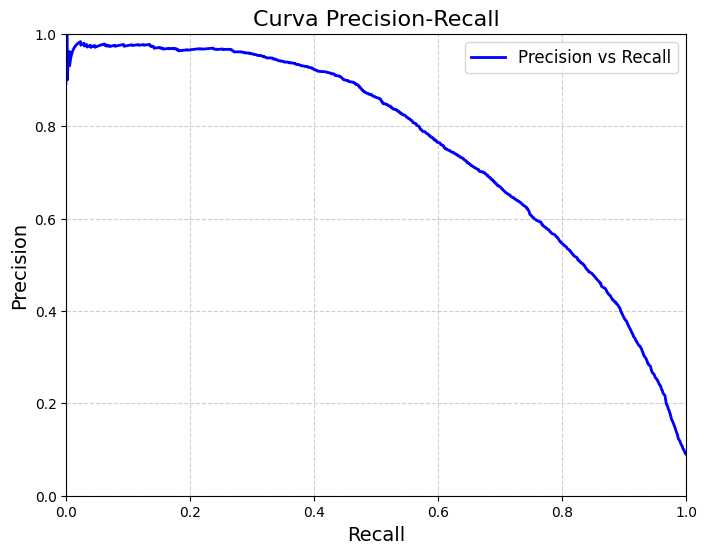

In [32]:
plotar_precision_vs_recall(precisions=precisions,recalls=recalls)

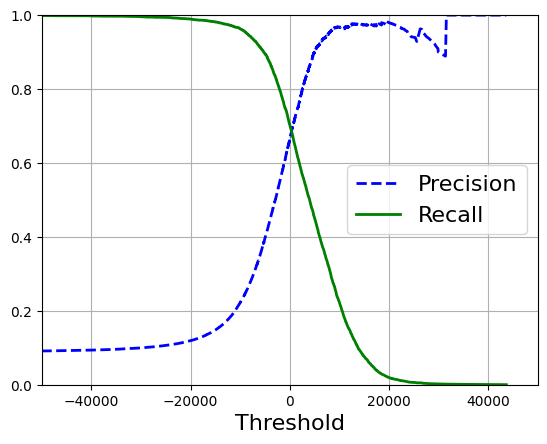

In [33]:
plotar_precision_recall_vs_threshold(precisions,recalls,thresholds)

In [34]:
thresholds_pred_90 = thresholds[np.argmax(precisions >= .9)]

In [35]:
thresholds_pred_80 = thresholds[np.argmax(precisions >= .8)]


In [36]:
y_train_pred_90 = y_scores >= thresholds_pred_90

In [37]:
y_train_pred_80 = y_scores >= thresholds_pred_80


In [38]:
precision_90_score = precision_score(y_train_5,y_train_pred_90)
recall_90_score = recall_score(y_train_5,y_train_pred_90)

In [39]:
print(f" Precisao 90% : {precision_90_score}")
print(f" Recall com Precisão 90% : {recall_90_score}")

 Precisao 90% : 0.9000799360511591
 Recall com Precisão 90% : 0.45030993801239755


In [40]:
print(f" Precisao 80% : {precision_score(y_train_5,y_train_pred_80)}")
print(f" Recall com Precisão 80% : {recall_score(y_train_5,y_train_pred_80)}")

 Precisao 80% : 0.8
 Recall com Precisão 80% : 0.5686862627474505


# Curva ROC

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score


In [42]:
fpr, tpr,thresholds= roc_curve(y_train_5,y_scores)

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)   

In [44]:
recall_90_precision = recall_90_score

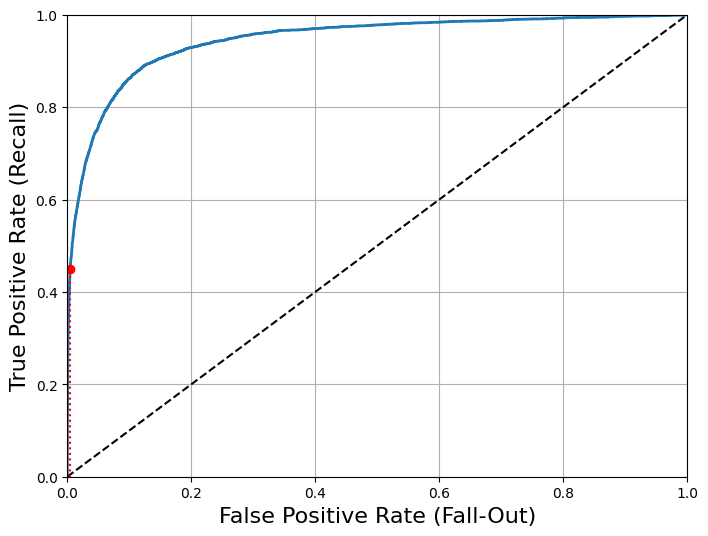

In [45]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
                                  # Not shown
plt.show()

In [46]:
roc_score = roc_auc_score(y_train_5,y_scores)
roc_score

np.float64(0.9453625226247914)

# RandomForest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [49]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [50]:
y_scores_forest = y_probas_forest[:,1] # Prob positivas de ser 5

In [51]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [52]:
roc_score_forest = roc_auc_score(y_train_5,y_scores_forest)
roc_score_forest

np.float64(0.9984360036951608)

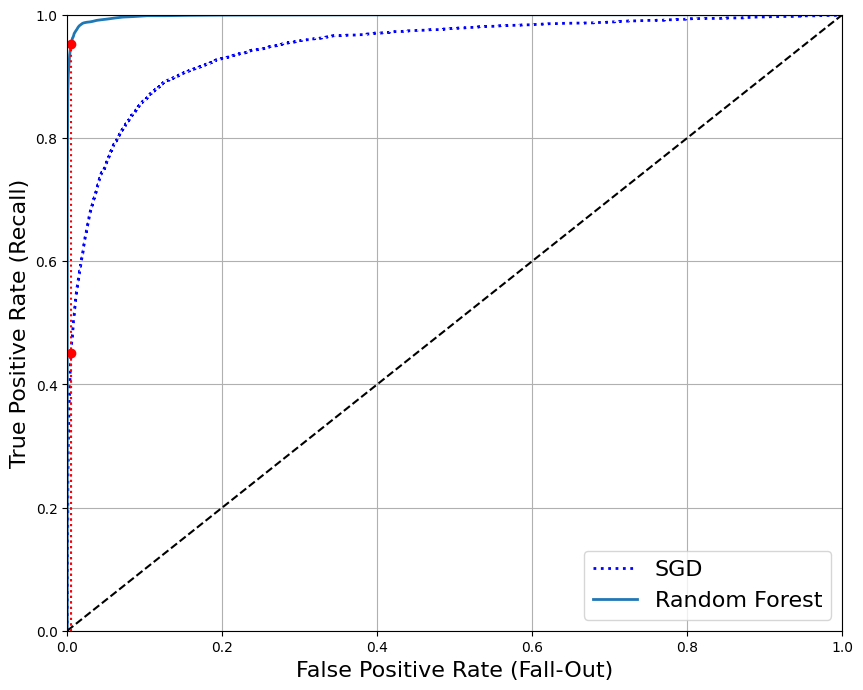

In [53]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

# Classificador Multiclasse

## SVC

In [109]:
from sklearn.preprocessing import StandardScaler

In [54]:
from sklearn.svm import SVC

In [69]:
svc = SVC(gamma='auto',random_state=42)

In [70]:
X = mnist['data']
y = mnist['target']

In [88]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,
                                                 random_state=42)

In [89]:
X_train_amostra = X_train2[:2000]
y_train_amostra = y_train2[:2000]

In [90]:
svc.fit(X_train_amostra,y_train_amostra)

SVC(gamma='auto', random_state=42)

In [82]:
sgdc.predict([some_digit])

array([ True])

In [91]:
svc.predict([some_digit])

array(['5'], dtype=object)

In [92]:
some_digit_scores = svc.decision_function([some_digit])
some_digit_scores

array([[ 3.83064909,  8.04358974,  5.84776801,  1.8195877 ,  4.8346594 ,
         9.29699632, -0.18704604,  2.82680496,  0.8195877 ,  6.85751595]])

In [93]:
np.argmax(some_digit_scores)

np.int64(5)

In [94]:
svc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Utilizando o Scaler

In [110]:
scaler = StandardScaler()

In [111]:
X_train_amostra_scaled = scaler.fit_transform(X_train_amostra.astype(np.float64))

In [113]:
cross_val_score(svc, X_train_amostra_scaled, y_train_amostra, cv=3, scoring="accuracy")

array([0.86056972, 0.89055472, 0.87837838])

## Random Forest

In [96]:
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)

In [97]:
rf_class.fit(X_train_amostra,y_train_amostra)


RandomForestClassifier(random_state=42)

In [98]:
rf_class.predict([some_digit])

array(['5'], dtype=object)

In [99]:
rf_class.predict_proba([some_digit])

array([[0.  , 0.02, 0.03, 0.08, 0.01, 0.82, 0.  , 0.02, 0.01, 0.01]])

In [100]:
rf_class.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [108]:
cross_val_score(rf_class,X_train_amostra,y_train_amostra,cv=3,scoring='accuracy')


array([0.90254873, 0.86806597, 0.90540541])

In [114]:
cross_val_score(rf_class, X_train_amostra_scaled, y_train_amostra, cv=3, scoring="accuracy")


array([0.90254873, 0.86806597, 0.90690691])

## SGDC

In [101]:
sgdc.fit(X_train_amostra,y_train_amostra)

SGDClassifier(random_state=42)

In [102]:
sgdc.predict([some_digit])

array(['5'], dtype='<U1')

In [103]:
sgdc.decision_function([some_digit])

array([[-2041116.52949968, -2317939.77557711, -1135502.84130783,
         -160409.67031395, -2181585.94720267,  1114489.8272917 ,
        -1889707.73914262, -1180417.08203101, -2201786.0912938 ,
        -2533861.79147527]])

In [104]:
sgdc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [107]:
cross_val_score(sgdc,X_train_amostra,y_train_amostra,cv=3,scoring='accuracy')

array([0.82908546, 0.8155922 , 0.81831832])

In [115]:
cross_val_score(sgdc, X_train_amostra_scaled, y_train_amostra, cv=3, scoring="accuracy")


array([0.84557721, 0.85457271, 0.84234234])

# Analise de Erro

## SGDC

In [116]:
y_train_pred = cross_val_predict(sgdc,X_train_amostra_scaled,y_train_amostra,cv = 3)


In [117]:
conf_matrix = confusion_matrix(y_train_amostra,y_train_pred)
conf_matrix

array([[187,   0,   3,   0,   1,   4,   3,   1,   0,   0],
       [  0, 214,   3,   1,   0,   2,   1,   2,   3,   0],
       [  1,   0, 156,  14,   7,   1,   9,   6,   8,   1],
       [  1,   1,  10, 160,   0,  12,   2,   2,   5,   3],
       [  3,   2,   2,   1, 169,   2,   2,   5,   2,  12],
       [  1,   1,   2,   6,   6, 140,   5,   1,  12,   9],
       [  4,   1,   3,   1,   3,   7, 172,   1,   2,   0],
       [  0,   3,   5,   3,   4,   1,   0, 168,   0,  14],
       [  3,   2,   3,   6,   2,  11,   3,   2, 161,   3],
       [  2,   1,   3,   2,  11,   4,   0,  11,   3, 168]])

In [126]:
errors_result = {}

In [130]:
for i in range(len(conf_matrix)):
    # print(i)
    qtd_errors = 0
    for j in range(len(conf_matrix[i])):
        if j != i:
            qtd_errors+=conf_matrix[i][j]
    errors_result[i] = qtd_errors


In [134]:
sorted_dict = dict(sorted(errors_result.items(), key=lambda x: x[1], reverse=True))
sorted_dict

{2: np.int64(47),
 5: np.int64(43),
 9: np.int64(37),
 3: np.int64(36),
 8: np.int64(35),
 4: np.int64(31),
 7: np.int64(30),
 6: np.int64(22),
 0: np.int64(12),
 1: np.int64(12)}

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [180]:
def plot_confusion_matrix_sns(conf_matrix, class_labels=None):
    plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura
    
    # Criando um heatmap com Seaborn
    sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", 
                linewidths=0.75, linecolor="gray", cbar=True)

    # Definição de rótulos se fornecidos
    if class_labels:
        plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, fontsize=12)
        plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, fontsize=12)
    
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)
    
    plt.show()

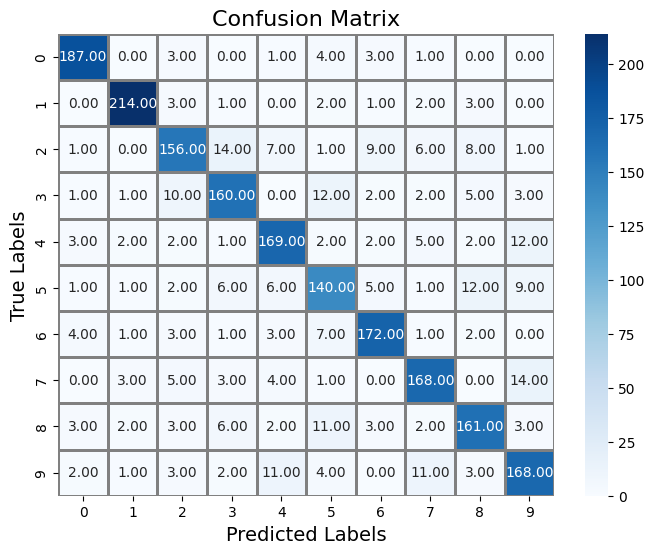

In [181]:
plot_confusion_matrix_sns(conf_matrix)

In [141]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums

In [168]:
norm_conf_mx

array([[0.        , 0.        , 0.01507538, 0.        , 0.00502513,
        0.0201005 , 0.01507538, 0.00502513, 0.        , 0.        ],
       [0.        , 0.        , 0.01327434, 0.00442478, 0.        ,
        0.00884956, 0.00442478, 0.00884956, 0.01327434, 0.        ],
       [0.00492611, 0.        , 0.        , 0.06896552, 0.03448276,
        0.00492611, 0.04433498, 0.02955665, 0.03940887, 0.00492611],
       [0.00510204, 0.00510204, 0.05102041, 0.        , 0.        ,
        0.06122449, 0.01020408, 0.01020408, 0.0255102 , 0.01530612],
       [0.015     , 0.01      , 0.01      , 0.005     , 0.        ,
        0.01      , 0.01      , 0.025     , 0.01      , 0.06      ],
       [0.00546448, 0.00546448, 0.01092896, 0.03278689, 0.03278689,
        0.        , 0.0273224 , 0.00546448, 0.06557377, 0.04918033],
       [0.02061856, 0.00515464, 0.01546392, 0.00515464, 0.01546392,
        0.03608247, 0.        , 0.00515464, 0.01030928, 0.        ],
       [0.        , 0.01515152, 0.0252525

In [171]:
for i in norm_conf_mx:
    print(np.round(i * 100,2))

norm_conf_mx_ = np.array(list(map(lambda valor : np.round(valor*100,2), norm_conf_mx)))

[0.   0.   1.51 0.   0.5  2.01 1.51 0.5  0.   0.  ]
[0.   0.   1.33 0.44 0.   0.88 0.44 0.88 1.33 0.  ]
[0.49 0.   0.   6.9  3.45 0.49 4.43 2.96 3.94 0.49]
[0.51 0.51 5.1  0.   0.   6.12 1.02 1.02 2.55 1.53]
[1.5 1.  1.  0.5 0.  1.  1.  2.5 1.  6. ]
[0.55 0.55 1.09 3.28 3.28 0.   2.73 0.55 6.56 4.92]
[2.06 0.52 1.55 0.52 1.55 3.61 0.   0.52 1.03 0.  ]
[0.   1.52 2.53 1.52 2.02 0.51 0.   0.   0.   7.07]
[1.53 1.02 1.53 3.06 1.02 5.61 1.53 1.02 0.   1.53]
[0.98 0.49 1.46 0.98 5.37 1.95 0.   5.37 1.46 0.  ]


In [172]:
norm_conf_mx_

array([[0.  , 0.  , 1.51, 0.  , 0.5 , 2.01, 1.51, 0.5 , 0.  , 0.  ],
       [0.  , 0.  , 1.33, 0.44, 0.  , 0.88, 0.44, 0.88, 1.33, 0.  ],
       [0.49, 0.  , 0.  , 6.9 , 3.45, 0.49, 4.43, 2.96, 3.94, 0.49],
       [0.51, 0.51, 5.1 , 0.  , 0.  , 6.12, 1.02, 1.02, 2.55, 1.53],
       [1.5 , 1.  , 1.  , 0.5 , 0.  , 1.  , 1.  , 2.5 , 1.  , 6.  ],
       [0.55, 0.55, 1.09, 3.28, 3.28, 0.  , 2.73, 0.55, 6.56, 4.92],
       [2.06, 0.52, 1.55, 0.52, 1.55, 3.61, 0.  , 0.52, 1.03, 0.  ],
       [0.  , 1.52, 2.53, 1.52, 2.02, 0.51, 0.  , 0.  , 0.  , 7.07],
       [1.53, 1.02, 1.53, 3.06, 1.02, 5.61, 1.53, 1.02, 0.  , 1.53],
       [0.98, 0.49, 1.46, 0.98, 5.37, 1.95, 0.  , 5.37, 1.46, 0.  ]])

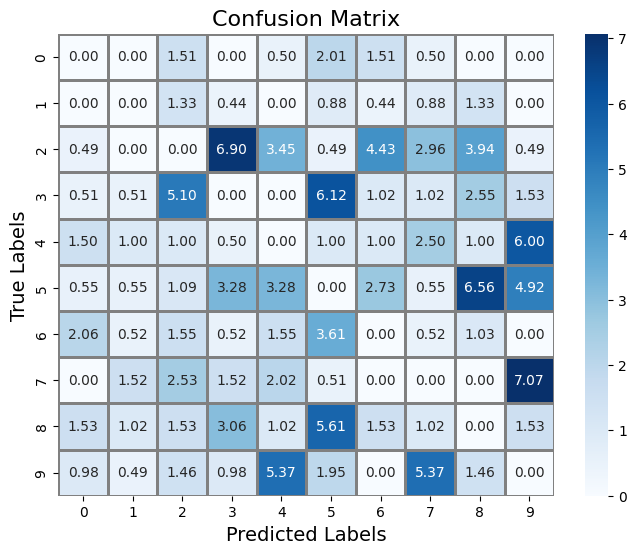

In [182]:
plot_confusion_matrix_sns(norm_conf_mx_)

In [202]:
cl_a, cl_b = '6', '8'
X_aa = X_train_amostra_scaled[(y_train_amostra == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_amostra_scaled[(y_train_amostra == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_amostra_scaled[(y_train_amostra == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_amostra_scaled[(y_train_amostra == cl_b) & (y_train_pred == cl_b)]

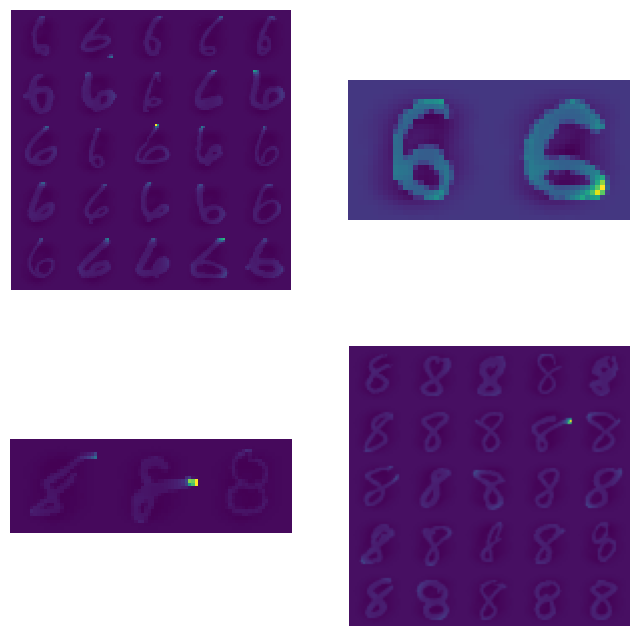

In [203]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# save_fig("error_analysis_digits_plot")
plt.show()

# Multirotulo

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [210]:
y_train_amostra = y_train_amostra.astype(int)

In [211]:
y_train_large = y_train_amostra >=7
y_train_odd = y_train_amostra%2 == 1

In [213]:
y_multilabel = np.c_[y_train_large,y_train_odd]

In [214]:
y_multilabel

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False,  True],
       [False, False]], shape=(2000, 2))

## KNN

In [215]:
knn = KNeighborsClassifier()

In [222]:
knn.fit(X_train_amostra,y_multilabel)

KNeighborsClassifier()

In [223]:
knn.predict([some_digit])

array([[False,  True]])

In [226]:
y_train_knn_pred = cross_val_predict(knn, X_train_amostra, y_multilabel, cv=5)
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9276500846589758